In [35]:
import sklearn
print('Zainstalowana wersja scikit-learn: {}.'.format(sklearn.__version__))

Zainstalowana wersja scikit-learn: 0.19.1.


In [36]:
import matplotlib.pyplot as py
import numpy as np
from scipy import diag, interp
#rom itertools import cycle

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# KLASY ROWNOLICZNE

In [93]:
#Generator danych
def data_generator ( ile ):
    mu = [ (-1,0.5), (1.2,4) ] #srednie klas, 2 klasy kazda ma 2 srednie (xmu, ymu) = 2 kolory punktow na rysunku
    cov = [ diag([3,3]), diag([4,1.7]) ] #macierze kowariancji dla klas, dwie, 2x2 o zdefiniowanej diagonali i zerach 
    
    X = np.zeros( (ile * len(mu), 2) ) #miejsce na dane wejsciowe
    Y = np.zeros( (ile * len(mu), 1), dtype = int ) #miejsce na dane wyjsciowe

    for klasa in range ( len(mu) ):
        X[ klasa * ile : (klasa + 1) * ile ] = np.random.multivariate_normal( mu[klasa], cov[klasa], ile )
        Y[ klasa * ile : (klasa + 1) * ile ] = klasa
    Y = Y.ravel() #flattened array [0,1], [0,2], [0,3], ..., [1, 0], [1, 1], ...
    return ( X, Y )

X:  [[-0.86063344  2.00420987]
 [-1.63087691  1.00141466]
 [-2.45191238 -1.62871496]
 [-0.89583007  2.26903074]
 [-3.05746155 -2.07493766]]
Y:  [0 0 0 0 0]


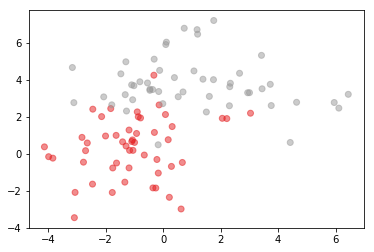

In [104]:
#generowanie danych i ich ilustracja
X, Y = data_generator(50)
print('X: ', X[0:5,:])
print('Y: ', Y[0:5])
py.scatter(X[:,0], X[:,1], c=Y, cmap=py.cm.Set1, alpha = 0.5)
py.show()

In [95]:
#podzial na zbior treningowy i testowy randomowo za pomoca f. bibliotecznej
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2 ) 

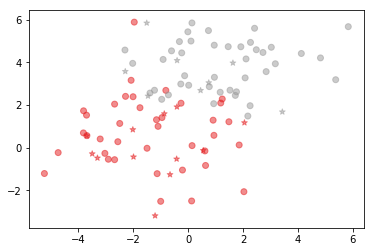

In [96]:
#Ilustracja przeprowadzonego wyzej podzialu
py.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=py.cm.Set1, alpha = 0.5)
py.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=py.cm.Set1, alpha = 0.5, marker = '*' )
py.show()

In [97]:
#regresja logistyczna - uczenie i testowanie
lr = LogisticRegression() #instancja klasyfikatora
lr.fit( X_train, Y_train ) #trening
Y_pred = lr.predict(X_test) #przewidywania

In [98]:
#Tworzymy macierz pomylek - TN, FP, FN, TP
print( metrics.confusion_matrix( Y_test, Y_pred ) )
TN, FP, FN, TP = metrics.confusion_matrix( Y_test, Y_pred ).ravel()
print( 'TN: ', TN, 'FP: ', FP, 'FN: ', FN, 'TP: ', TP )

[[11  1]
 [ 2  6]]
TN:  11 FP:  1 FN:  2 TP:  6


In [99]:
#Przechodzimy do walidacji klasyfikacji - PPV, TPR, ACC, f1 i MCC
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2 )
    lr.fit( X_train, Y_train )
    Y_pred = lr.predict(X_test)
    
    PPV = metrics.precision_score( Y_test, Y_pred )
    TPR = metrics.recall_score( Y_test, Y_pred )
    ACC = metrics.accuracy_score( Y_test, Y_pred )
    F1 = metrics.f1_score( Y_test, Y_pred )
    MCC = metrics.matthews_corrcoef( Y_test, Y_pred )
    
    print( 'PPV = {p:.3f} TPR = {r:.3f} ACC = {a:.3f} F1 = {f:.3f} MCC =  {m:.3f}  '.format(a=ACC,f=F1,m=MCC,p=PPV,r=TPR))

PPV = 0.750 TPR = 1.000 ACC = 0.850 F1 = 0.857 MCC =  0.739  
PPV = 0.833 TPR = 1.000 ACC = 0.900 F1 = 0.909 MCC =  0.816  
PPV = 0.900 TPR = 0.818 ACC = 0.850 F1 = 0.857 MCC =  0.704  
PPV = 0.900 TPR = 0.818 ACC = 0.850 F1 = 0.857 MCC =  0.704  
PPV = 1.000 TPR = 1.000 ACC = 1.000 F1 = 1.000 MCC =  1.000  
PPV = 1.000 TPR = 0.923 ACC = 0.950 F1 = 0.960 MCC =  0.899  
PPV = 0.750 TPR = 1.000 ACC = 0.850 F1 = 0.857 MCC =  0.739  
PPV = 0.833 TPR = 1.000 ACC = 0.900 F1 = 0.909 MCC =  0.816  
PPV = 0.909 TPR = 0.909 ACC = 0.900 F1 = 0.909 MCC =  0.798  
PPV = 1.000 TPR = 0.786 ACC = 0.850 F1 = 0.880 MCC =  0.724  


In [100]:
#k-fold cross validation za pomoca funkcji bibliotecznej
ppv = cross_val_score(lr, X, Y, cv=10, scoring='precision')
print('PPV = {0:.2f} +/- {1:.2f}'.format(ppv.mean(),ppv.std()))
rec = cross_val_score(lr, X, Y, cv=10, scoring='recall')
print('REC = {0:.2f} +/- {1:.2f}'.format(rec.mean(),rec.std()))
acc = cross_val_score(lr, X, Y, cv=10, scoring='accuracy')
print('ACC = {0:.2f} +/- {1:.2f}'.format(acc.mean(),acc.std()))
f1 = cross_val_score(lr, X, Y, cv=10, scoring='f1')
print('F1 = {0:.2f} +/- {1:.2f}'.format(f1.mean(),f1.std()))

PPV = 0.88 +/- 0.12
REC = 0.94 +/- 0.09
ACC = 0.90 +/- 0.10
F1 = 0.91 +/- 0.09


In [45]:
#Krzywa ROC - srednia poprawnosc klasyfikatora
skf = StratifiedKFold(n_splits=6)
lr = LogisticRegression()
tprs = []
aucs = []
mean_fpr = np.linspace( 0, 1, 100 )

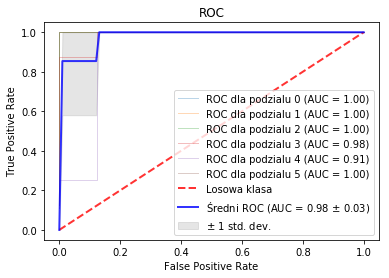

In [46]:
i = 0
for train, test in skf.split( X, Y ):
    lr.fit( X[train], Y[train] )
    #prwd przynaleznowsci do danej klasy przykladu testowego
    #(zwraca w wierszu prwd dla kazdej z mozliwych klas)
    klasyfikacja = lr.predict_proba(X[test]) 
    #obliczanie punktow krzywej ROC wzgledem prwd klasy 1
    fpr, tpr, tresholds = metrics.roc_curve( Y[test], klasyfikacja[:, 1] ) #fpr i tpr dla kolejnych progow
    tprs.append( interp(mean_fpr, fpr, tpr ) ) #interpolacja - tpr dla 100 fpr'ow
    tprs[-1][0] = 0.0 #?????????????????????????
    #obliczanie pola pod otrzymana krzywa dla danego zestawu testowego
    roc_auc = metrics.auc( fpr, tpr )
    aucs.append(roc_auc)
    #rysujemy krzywa
    py.plot( fpr, tpr, lw=1, alpha=0.3, label='ROC dla podzialu %d (AUC = %0.2f)' %( i, roc_auc ) )
    
    i += 1
py.plot( [0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Losowa klasa', alpha=.8)

#poniżej podsumowanie: obliczanie średnich i standardowych odchyleń, cieniowanie przedziału ufności 
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
py.plot(mean_fpr, mean_tpr, color='b',
         label=r'Średni ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
py.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

py.xlim([-0.05, 1.05])
py.ylim([-0.05, 1.05])
py.xlabel('False Positive Rate')
py.ylabel('True Positive Rate')
py.title('ROC')
py.legend(loc="lower right")
py.show()

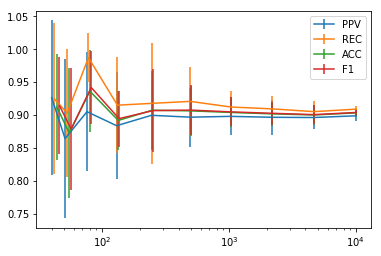

In [47]:
#Zaleznosc miary jakosci od rozmiaru zbioru uczacego
N = 10
PPV_mean = np.zeros( (N,1) )
PPV_std = np.zeros( (N,1) )
REC_mean = np.zeros( (N,1) )
REC_std = np.zeros( (N,1) )
ACC_mean = np.zeros( (N,1) )
ACC_std = np.zeros( (N,1) )
F1_mean = np.zeros( (N,1) )
F1_std = np.zeros( (N,1) )

n = 30 + np.floor( np.logspace(1,4,N) ).astype(int)
for i in range(N):
    X,Y = data_generator( int(n[i]) )
    lr = LogisticRegression()
    ppv = cross_val_score( lr, X, Y, cv=10, scoring='precision' )
    PPV_mean[i] =ppv.mean()
    PPV_std[i]  = ppv.std()
    rec = cross_val_score( lr, X, Y, cv=10, scoring='recall' )
    REC_mean[i]  = rec.mean()
    REC_std[i]  = rec.std()
    acc = cross_val_score( lr, X, Y, cv=10, scoring='accuracy' )
    ACC_mean[i]  = acc.mean()
    ACC_std[i]  = acc.std()
    f1 = cross_val_score( lr, X, Y, cv=10, scoring='f1' )
    F1_mean[i]  = f1.mean()
    F1_std[i]  = f1.std()

ax = py.subplot(1,1,1)
py.errorbar(n,PPV_mean,yerr=PPV_std)
py.errorbar(n+2,REC_mean,yerr=REC_std)
py.errorbar(n+4,ACC_mean,yerr=ACC_std)
py.errorbar(n+6,F1_mean,yerr=F1_std)
py.legend(('PPV','REC','ACC','F1'))
ax.set_xscale("log", nonposx='clip')
py.show()

# KLASY NIEZROWNOWAZONE

In [158]:
#Generator danych nierownolicznych
def data_generator_rozne( ile, M ):
    mu = [(-1,0.5),(1,4)]
    cov = [diag([1.7,1.8]), diag([1.5,0.7])]
    X = np.zeros( ( (M + 1) * ile, 2 ) ) # miejsce na dane wejściowe
    Y = np.zeros( ( (M + 1) * ile, 1 ), dtype = int ) # miejsce na dane wyjściowe
    klasa = 0
    X[0:ile] = np.random.multivariate_normal( mu[klasa], cov[klasa], ile )
    Y[0:ile] = klasa
    klasa = 1
    X[ile:ile * (M + 1) ] = np.random.multivariate_normal( mu[klasa], cov[klasa], ile * M )
    Y[ile:ile * (M + 1) ] = klasa
    Y = Y.ravel()
    return( X, Y )

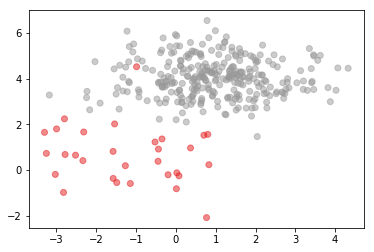

In [159]:
#Rysowanie danych 
X, Y = data_generator_rozne( 30, 10 )
py.scatter(X[:,0], X[:,1], c=Y, cmap=py.cm.Set1, alpha = 0.5)
py.show()

In [165]:
#k-fold cross validation za pomoca funkcji bibliotecznej
lr = LogisticRegression()
ppv = cross_val_score( lr, X, Y, cv=10, scoring='precision' )
print( 'PPV = {0:.2f} +/- {1:.2f}'.format( ppv.mean(), ppv.std() ) )
rec = cross_val_score( lr, X, Y, cv=10, scoring='recall' )
print( 'REC = {0:.2f} +/- {1:.2f}'.format( rec.mean(), rec.std() ) )
acc = cross_val_score( lr, X, Y, cv=10, scoring='accuracy' )
print( 'ACC = {0:.2f} +/- {1:.2f}'.format( acc.mean(), acc.std() ) )
f1 = cross_val_score( lr, X, Y, cv=10, scoring='f1' )
print( 'F1 = {0:.2f} +/- {1:.2f}'.format( f1.mean(), f1.std() ) )

#10-krotne trenowanie modelu na 90% losowych przykladow, walidacja na 10% przykladow
MCC=np.zeros((10,1))
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1 ) # test na 10% aby było podobnie jak dla podziału 10-krotnego
    lr.fit( X_train, Y_train ) # trenuj model
    Y_pred = lr.predict(X_test) # predykcja dla zbioru testowego
    MCC[i] = metrics.matthews_corrcoef(  Y_test, Y_pred )
print( 'MCC = {0:.2f} +/- {1:.2f}'.format( MCC.mean(), MCC.std() ) )  

PPV = 0.98 +/- 0.03
REC = 1.00 +/- 0.00
ACC = 0.98 +/- 0.02
F1 = 0.99 +/- 0.01
MCC = 0.84 +/- 0.30


/work/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [161]:
#podzial z zachowaniem proporcji klas
skf = StratifiedKFold(n_splits=4)
for train, test in skf.split(X, Y):  
    lr.fit(X[train,:],Y[train])
    y_pred = lr.predict(X[test,:]) 
    y_test = Y[test]
    PPV = metrics.precision_score(y_test, y_pred)
    REC = metrics.recall_score(y_test, y_pred)
    ACC = metrics.accuracy_score(y_test, y_pred)
    F1 = metrics.f1_score(y_test, y_pred)
    MCC = metrics.matthews_corrcoef(y_test, y_pred)
    
    print('PPV = {p:.3f} REC = {r:.3f} ACC = {a:.3f} F1 = {f:.3f} MCC =  {m:.3f}  '.format(a=ACC,f=F1,m=MCC,p=PPV,r=REC))

PPV = 0.962 REC = 1.000 ACC = 0.964 F1 = 0.980 MCC =  0.775  
PPV = 0.962 REC = 1.000 ACC = 0.964 F1 = 0.980 MCC =  0.775  
PPV = 1.000 REC = 1.000 ACC = 1.000 F1 = 1.000 MCC =  1.000  
PPV = 1.000 REC = 1.000 ACC = 1.000 F1 = 1.000 MCC =  1.000  


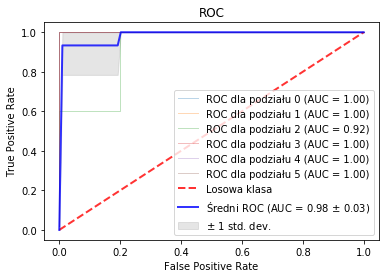

In [162]:
skf  = StratifiedKFold(n_splits=6)
lr = LogisticRegression()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in skf .split(X, Y):
    lr.fit(X[train],Y[train]) # fitujemy regresję
    probas_ = lr.predict_proba(X[test]) # obliczamy prawdopodobieństwa przynależności przykładów testowych 
                                        # do klas wg. wyuczonego klasyfikatora 
                                        # (zwraca on w danym wierszu prawdopodobieństaw dla każdej z możliwych klas)
   
    # Obliczamy punkty krzywej ROC 
    fpr, tpr, thresholds = metrics.roc_curve(Y[test], probas_[:, 1]) # względem prawdopodobieństwa klasy 1 
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    # i powierzchnię pod krzywą
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    # rysujemy krzywą 
    py.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC dla podziału %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    
py.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Losowa klasa', alpha=.8)
# poniżej podsumowanie: obliczanie średnich i standardowych odchyleń, cieniowanie przedziału ufności 
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
py.plot(mean_fpr, mean_tpr, color='b',
         label=r'Średni ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
py.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

py.xlim([-0.05, 1.05])
py.ylim([-0.05, 1.05])
py.xlabel('False Positive Rate')
py.ylabel('True Positive Rate')
py.title('ROC')
py.legend(loc="lower right")
py.show()